In [16]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt

In [17]:
df = pd.read_csv("shampoo_sales.csv")
df

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3
5,1-06,168.5
6,1-07,231.8
7,1-08,224.5
8,1-09,192.8
9,1-10,122.9


In [18]:

df['Month']=pd.date_range(start="1/1/2000",periods=36,freq='1MS')
df['Month']
df.set_index('Month',inplace=True)


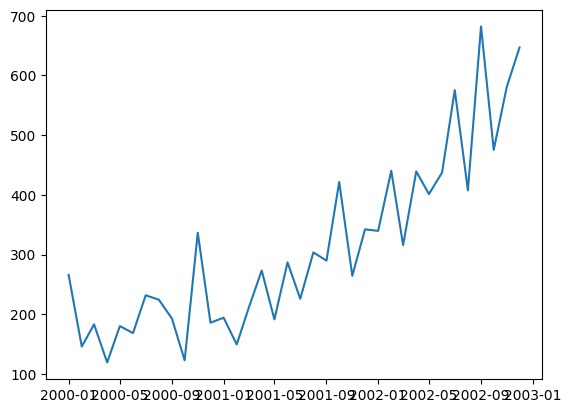

In [94]:
plt.plot(df)

In [20]:
#performing rolling statistics and standard deviation
rollmean = df.rolling(window=6).mean()
rollstd = df.rolling(window=6).std()
print(rollmean,rollstd)

                 Sales
Month                 
2000-01-01         NaN
2000-02-01         NaN
2000-03-01         NaN
2000-04-01         NaN
2000-05-01         NaN
2000-06-01  177.183333
2000-07-01  171.483333
2000-08-01  184.583333
2000-09-01  186.200000
2000-10-01  186.800000
2000-11-01  212.833333
2000-12-01  215.733333
2001-01-01  209.483333
2001-02-01  196.983333
2001-03-01  199.866667
2001-04-01  224.933333
2001-05-01  200.750000
2001-06-01  217.600000
2001-07-01  222.883333
2001-08-01  248.566667
2001-09-01  261.866667
2001-10-01  286.583333
2001-11-01  298.766667
2001-12-01  307.983333
2002-01-01  326.933333
2002-02-01  349.733333
2002-03-01  354.066667
2002-04-01  357.016667
2002-05-01  379.816667
2002-06-01  395.666667
2002-07-01  434.966667
2002-08-01  429.500000
2002-09-01  490.516667
2002-10-01  496.516667
2002-11-01  526.516667
2002-12-01  561.433333                  Sales
Month                 
2000-01-01         NaN
2000-02-01         NaN
2000-03-01         NaN
2000-04-01 

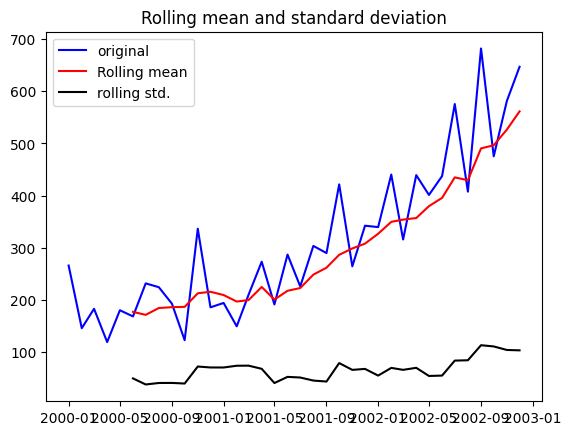

In [21]:
orig = plt.plot(df['Sales'],color='blue',label='original')
mean = plt.plot(rollmean,color='red',label = 'Rolling mean')
std = plt.plot(rollstd,color='black',label = 'rolling std.')
plt.legend(loc='best')
plt.title('Rolling mean and standard deviation')
plt.show(block=False)

In [22]:
#performming dickey fuller test
from statsmodels.tsa.stattools import adfuller
print("Dickey fuller result :")
dftest = adfuller(df['Sales'],autolag = 'AIC')
output = pd.Series(dftest[0:4],index=['Test Statistics','p-value','#Lags Used','Number of Observations Used'])
for key , value in dftest[4].items():
   output['Critical Values (%s)'%key]=value
print(output)

Dickey fuller result :
Test Statistics                 3.060142
p-value                         1.000000
#Lags Used                     10.000000
Number of Observations Used    25.000000
Critical Values (1%)           -3.723863
Critical Values (5%)           -2.986489
Critical Values (10%)          -2.632800
dtype: float64


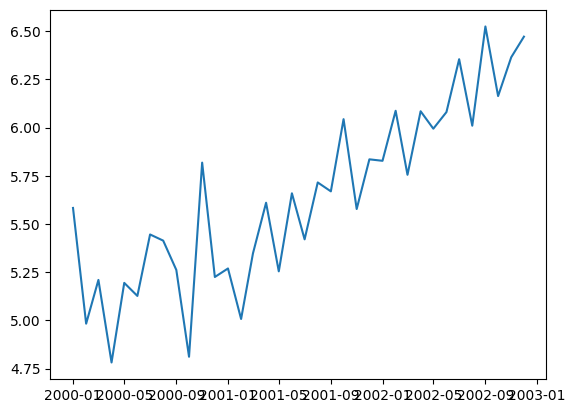

In [23]:
#Estimating trend
df_logscale = np.log(df)
plt.plot(df_logscale)

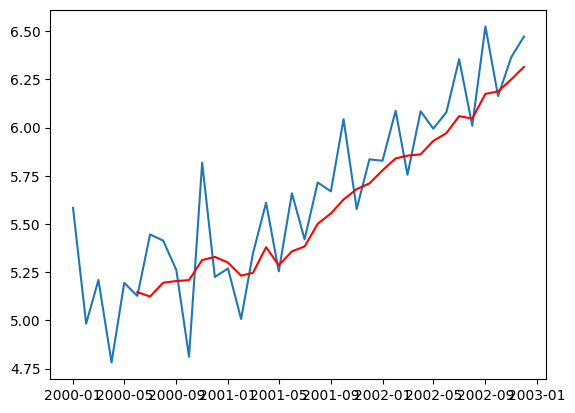

In [24]:
movingavg = df_logscale.rolling(window=6).mean()
movingstd = df_logscale.rolling(window=6).std()
plt.plot(df_logscale)
plt.plot(movingavg,color='red')
#plt.plot(movingstd,color='black')

In [25]:
df_logscale_minus_movingavg = df.copy()
df_logscale_minus_movingavg=df_logscale-movingavg
df_logscale_minus_movingavg=df_logscale_minus_movingavg-df_logscale_minus_movingavg.shift(1)
#df_logscale_minus_movingavg.head(12)

#drop NAN values
df_logscale_minus_movingavg.dropna(inplace=True)
#df_logscale_minus_movingavg.head(10)
df_logscale_minus_movingavg.head()


,Sales
Month,
2000-07-01,0.341876
2000-08-01,-0.103825
2000-09-01,-0.160826
2000-10-01,-0.455237
2000-11-01,0.903231


In [26]:
df_logscale_minus_movingavg


,Sales
Month,
2000-07-01,0.341876
2000-08-01,-0.103825
2000-09-01,-0.160826
2000-10-01,-0.455237
2000-11-01,0.903231
2000-12-01,-0.609768
2001-01-01,0.073606
2001-02-01,-0.194344
2001-03-01,0.325966


In [27]:
from statsmodels.tsa.stattools import adfuller
def test_timeseries (timeseries):
    
    #determing rolling statistics
    movingAVG= timeseries.rolling(window=12).mean()
    movingSTD=timeseries.rolling(window=12).std()
    
    #plot rolling statistics
    orig=plt.plot(timeseries,color='blue',label='original')
    mean=plt.plot(movingAVG,color='red',label='moving avg')
    std=plt.plot(movingSTD,color='black',label='standard deviation')
    plt.legend(loc='best')
    plt.title('Rolling mean and standard deviation')
    plt.show(block = False)
    
    #perform dickey fuller test
    print("Results of dickey fuller test")
    DFtest= adfuller(timeseries,autolag='AIC')
    DFoutput=pd.Series(DFtest[0:4],index=['test statistics','p-value','lags used','total observations'])
    for key,value in DFtest[4].items():
        DFoutput['Critical values (%s)' %key]= value
    print(DFoutput)

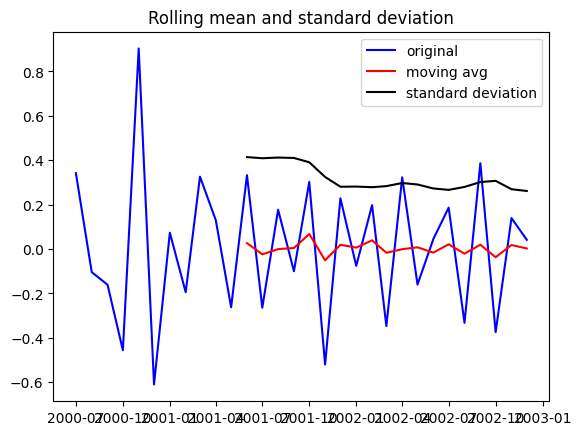

Results of dickey fuller test
test statistics          -4.474848
p-value                   0.000218
lags used                 9.000000
total observations       20.000000
Critical values (1%)     -3.809209
Critical values (5%)     -3.021645
Critical values (10%)    -2.650713
dtype: float64


In [28]:
test_timeseries(df_logscale_minus_movingavg)

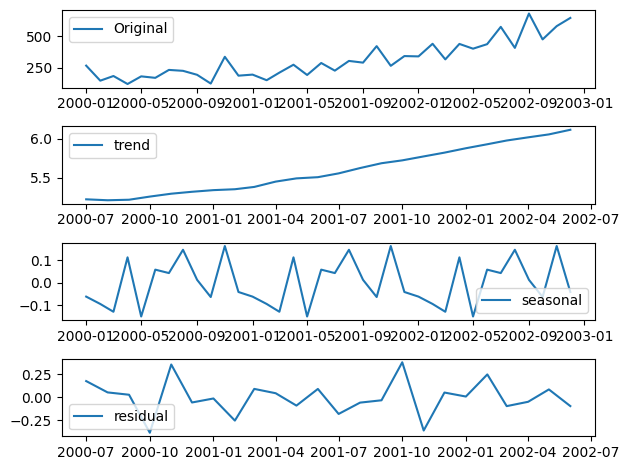

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposation = seasonal_decompose(df_logscale)

trend = decomposation.trend
seasonal = decomposation.seasonal
residual = decomposation.resid

plt.subplot(411)
plt.plot(df,label = 'Original')
plt.legend(loc = 'best')
plt.subplot(412)
plt.plot(trend,label='trend')
plt.legend(loc = 'best')
plt.subplot(413)
plt.plot(seasonal,label='seasonal')
plt.legend(loc = 'best')
plt.subplot(414)
plt.plot(residual,label='residual')
plt.legend(loc = 'best')
plt.tight_layout()




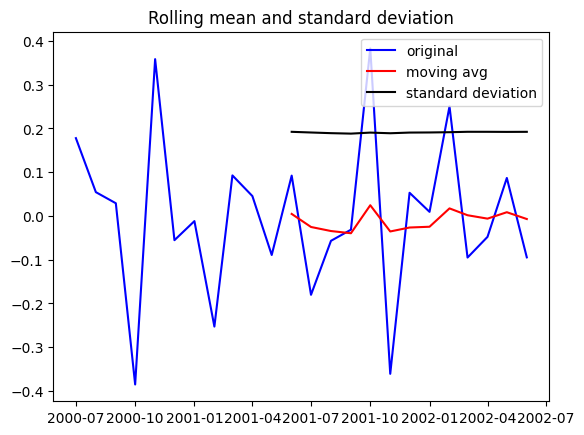

Results of dickey fuller test
test statistics          -1.344175
p-value                   0.608728
lags used                 9.000000
total observations       14.000000
Critical values (1%)     -4.012034
Critical values (5%)     -3.104184
Critical values (10%)    -2.690987
dtype: float64


In [30]:
decomposedLogData = residual
decomposedLogData.dropna(inplace = True)
test_timeseries(decomposedLogData)

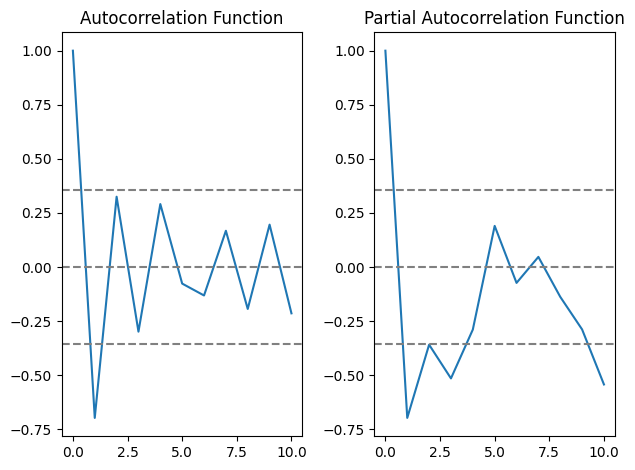

In [31]:
from statsmodels.tsa.stattools import acf,pacf

log_acf =acf(df_logscale_minus_movingavg,nlags= 10)
lag_pacf = pacf(df_logscale_minus_movingavg,nlags=10,method='ols')

#plot ACF :
plt.subplot(121)
plt.plot(log_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_logscale_minus_movingavg)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_logscale_minus_movingavg)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')


#plot pacf :

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_logscale_minus_movingavg)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_logscale_minus_movingavg)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')

plt.tight_layout()


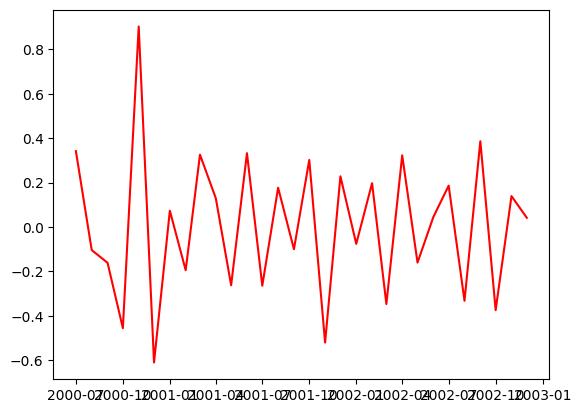

In [95]:
stationary = df_logscale_minus_movingavg
plt.plot(stationary,color='red')

In [41]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [44]:
stepwiseFit = auto_arima(stationary['Sales'],trace=True)

stepwiseFit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.62 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=21.719, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=3.327, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=19.729, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1.351, Time=0.09 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-5.094, Time=0.26 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=-6.408, Time=0.28 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=-5.584, Time=0.39 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=-4.973, Time=0.50 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-6.070, Time=0.50 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=-3.938, Time=0.64 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=-8.405, Time=0.18 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=-7.080, Time=0.11 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=-7.584, Time=0.25 sec
 ARIM

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   30
Model:               SARIMAX(4, 0, 0)   Log Likelihood                   9.203
Date:                Mon, 20 Feb 2023   AIC                             -8.405
Time:                        17:12:33   BIC                             -1.399
Sample:                    07-01-2000   HQIC                            -6.164
                         - 12-01-2002                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3041      0.222     -5.875      0.000      -1.739      -0.869
ar.L2         -1.1551      0.286     -4.043      0.000      -1.715      -0.595
ar.L3         -0.9556      0.235     -4.062      0.000      -1.417      -0.495
ar.L4         -0.3861      0.202     -1.915      0.055      -0.781       0.009
sigma2         0.0292      0.008      3.886      0.000       0.014       0.044
===================================================================================
Ljung-Box (L1) (Q):                   0.21   Jarque-Bera (JB):                 1.24
Prob(Q):                              0.64   Prob(JB):                         0.54
Heteroskedasticity (H):               0.35   Skew:                            -0.32
Prob(H) (two-sided):                  0.11   Kurtosis:                         3.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [45]:
from statsmodels.tsa.arima.model import ARIMA

In [66]:
print(stationary.shape)
train = stationary.iloc[:-10]
test = stationary.iloc[-10:]
print(train.shape,test.shape)

(30, 1)
(20, 1) (10, 1)


In [68]:
model=ARIMA(train['Sales'],order=(4,0,0))
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   20
Model:                 ARIMA(4, 0, 0)   Log Likelihood                   3.693
Date:                Mon, 20 Feb 2023   AIC                              4.615
Time:                        17:44:08   BIC                             10.589
Sample:                    07-01-2000   HQIC                             5.781
                         - 02-01-2002                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0005      0.012     -0.043      0.966      -0.025       0.024
ar.L1         -1.2092      0.268     -4.516      0.000      -1.734      -0.684
ar.L2         -1.0623      0.339     -3.137      0.002      -1.726      -0.399
ar.L3         -0.9218      0.292     -3.152      0.002      -1.495      -0.349
ar.L4         -0.3319      0.281     -1.180      0.238      -0.883       0.220
sigma2         0.0358      0.012      2.992      0.003       0.012       0.059
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):                 0.25
Prob(Q):                              0.73   Prob(JB):                         0.88
Heteroskedasticity (H):               0.31   Skew:                            -0.23
Prob(H) (two-sided):                  0.14   Kurtosis:                         3.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [69]:
start = len(train)
end = len(train)+len(test)-1
pred= model.predict(start= start,end=end,typ='levels')
print(pred)

2002-03-01   -0.199074
2002-04-01    0.022179
2002-05-01    0.025160
2002-06-01    0.061517
2002-07-01   -0.057879
2002-08-01   -0.028319
2002-09-01    0.028266
2002-10-01    0.026432
2002-11-01   -0.019075
2002-12-01   -0.024071
Freq: MS, Name: predicted_mean, dtype: float64


<AxesSubplot: xlabel='Month'>

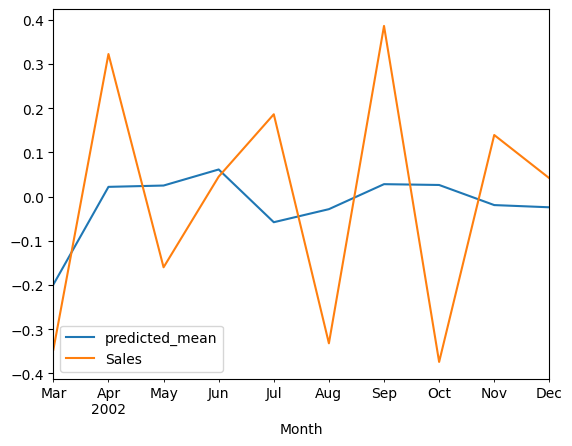

In [70]:
pred.plot(legend=True)
test['Sales'].plot(legend=True)

In [64]:
test['Sales'].mean()

-0.009034034158639504

In [65]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(pred,test['Sales']))
print(rmse)

0.24840093569536553


In [72]:
model2=ARIMA(stationary['Sales'],order=(4,0,0))
model2 = model2.fit()
stationary.tail()


,Sales
Month,
2002-08-01,-0.332053
2002-09-01,0.386476
2002-10-01,-0.374211
2002-11-01,0.139561
2002-12-01,0.041701


In [88]:
future_dates=pd.date_range(start='2002-12-01',end='2004-01-1',freq='M')
pred=model2.predict(start=len(stationary), end=len(stationary)+12, typ='levels')
pred.index=future_dates
print(pred)

2002-12-31   -0.005569
2003-01-31   -0.027914
2003-02-28   -0.049393
2003-03-31    0.087530
2003-04-30   -0.026540
2003-05-31   -0.006796
2003-06-30   -0.023410
2003-07-31    0.031568
2003-08-31    0.004331
2003-09-30   -0.015423
2003-10-31   -0.004353
2003-11-30    0.008812
2003-12-31    0.008292
Freq: M, Name: predicted_mean, dtype: float64


<AxesSubplot: >

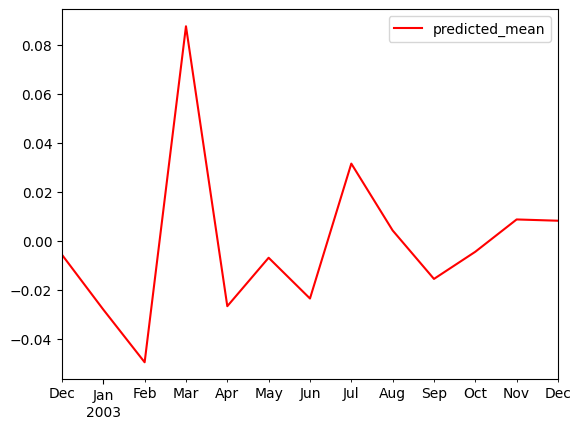

In [93]:

pred.plot(legend=True,color='red')